### 1 - Import packages

In [28]:
import gensim
from gensim.models import CoherenceModel

import pandas as pd
import ast
import matplotlib.pyplot as plt

import collections
from collections import defaultdict

import json

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2 - Import Data

In [29]:
# crystalsg_df = pd.read_csv("instagram_crystalsg_hashtag_clean.csv")

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
crystalsg_df = pd.read_csv("instagram_crystalsg_hashtag_clean_new.csv")

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
crystalsg_df.head()

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,postUrl,profileUrl,username,fullName,commentCount,likeCount,pubDate,description,imgUrl,...,type,query,timestamp,location,isSidecar,sidecarMedias,videoUrl,viewCount,clean_description,clean_tokens
0,0,https://www.instagram.com/p/CaJQO5HPHO1/,https://www.instagram.com/petalsofarosez,petalsofarosez,Amanda Low,16,910,2022-02-19T03:56:44.000Z,You deserve a single shot! The night where I w...,https://scontent-iad3-2.cdninstagram.com/v/t51...,...,Photo,#crystalsg,2022-03-18T04:48:25.073Z,Singapore / Singapura / 新加坡 / சிங்கப்பூர்,False,NaN,NaN,NaN,deserve single shot night appreciate beauty co...,"['deserve', 'single', 'shot', 'night', 'apprec..."
1,1,https://www.instagram.com/p/CZMdip8PCzX/,https://www.instagram.com/princessezyt,princessezyt,Triple R Mummy Princess,102,527,2022-01-26T13:19:21.000Z,"This CNY, get yourself or your love ones a NEW...",https://scontent-iad3-2.cdninstagram.com/v/t51...,...,Carousel,#crystalsg,2022-03-18T04:48:25.073Z,"PARKROYAL COLLECTION Marina Bay, Singapore",True,7.0,NaN,NaN,cny get love one new pretty crystal water bott...,"['cny', 'get', 'love', 'one', 'new', 'pretty',..."
2,2,https://www.instagram.com/p/CZviYgxvmz7/,https://www.instagram.com/moonwanderer.est2020,moonwanderer.est2020,moonwandererclub,9,711,2022-02-09T04:15:04.000Z,— my 💙 for you as deep as the ocean\n\nFeaturi...,https://scontent-iad3-2.cdninstagram.com/v/t51...,...,Carousel,#crystalsg,2022-03-18T04:48:25.073Z,Atlantic Ocean,True,3.0,NaN,NaN,deep ocean feature gemmy teal blue purple fluo...,"['deep', 'ocean', 'feature', 'gemmy', 'teal', ..."
3,3,https://www.instagram.com/p/CUaL0oNPhEm/,https://www.instagram.com/crystalliac,crystalliac,💫 Crystals Shop 💫,5,131,2021-09-29T14:36:55.000Z,• LET’S GO GREEN! • (PREVIEW)\nJoin us on Satu...,https://scontent-iad3-2.cdninstagram.com/v/t51...,...,Carousel,#crystalsg,2022-03-18T04:48:25.073Z,Singapore,True,9.0,NaN,NaN,let go green preview join saturday night octob...,"['let', 'go', 'green', 'preview', 'join', 'sat..."
4,4,https://www.instagram.com/p/CW76Q2ZPwI9/,https://www.instagram.com/rehauscrystals,rehauscrystals,RehausCrystals,109,51204,2021-12-01T10:00:27.000Z,🍬[ℙ𝕚𝕟𝕜 ℝ𝕠𝕤𝕖 ℚ𝕦𝕒𝕣𝕥𝕫 𝕋𝕦𝕞𝕓𝕝𝕖𝕤]🍬\n\n💕Lovin these P...,https://scontent-iad3-2.cdninstagram.com/v/t51...,...,Carousel,#crystalsg,2022-03-18T04:48:25.074Z,NaN,True,4.0,NaN,NaN,pink gemmy rise quartz tumble literal candy ri...,"['pink', 'gemmy', 'rise', 'quartz', 'tumble', ..."


### 3 - Prepare corpus for building Latent Dirichlet Allocation (LDA) Model

In [32]:
# Helper function
def docs2vecs(docs, dictionary):
    # docs is a list of documents returned by corpus2docs.
    # dictionary is a gensim.corpora.Dictionary object.
    vecs = [dictionary.doc2bow(doc) for doc in docs]
    return vecs

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
crystalsg_docs = [ast.literal_eval(doc) for doc in crystalsg_df["clean_tokens"]]
crystalsg_dict = gensim.corpora.Dictionary(crystalsg_docs)
crystalsg_vecs = docs2vecs(crystalsg_docs, crystalsg_dict)

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 4 - Build LDA Model

In [34]:
crystalsg_lda = gensim.models.ldamodel.LdaModel(corpus=crystalsg_vecs, id2word=crystalsg_dict, num_topics=10)

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4a - View topics

In [35]:
topics = crystalsg_lda.show_topics(5, 10)

for i in range(0, 5):
    print(topics[i])

(2, '0.012*"dm" + 0.011*"piece" + 0.011*"crystal" + 0.010*"bracelet" + 0.010*"sale" + 0.009*"quartz" + 0.007*"agate" + 0.007*"tower" + 0.007*"energy" + 0.007*"help"')
(0, '0.012*"dm" + 0.008*"tower" + 0.008*"agate" + 0.006*"crystal" + 0.006*"x" + 0.006*"quartz" + 0.006*"amethyst" + 0.005*"energy" + 0.005*"e" + 0.004*"bracelet"')
(1, '0.019*"dm" + 0.014*"l" + 0.014*"quartz" + 0.012*"available" + 0.011*"tower" + 0.011*"agate" + 0.010*"interested" + 0.010*"sale" + 0.009*"live" + 0.009*"crystal"')
(6, '0.025*"crystal" + 0.022*"dm" + 0.014*"claim" + 0.011*"live" + 0.010*"agate" + 0.009*"sale" + 0.008*"available" + 0.008*"bracelet" + 0.008*"free" + 0.007*"please"')
(9, '0.013*"energy" + 0.010*"crystal" + 0.009*"moonstone" + 0.008*"help" + 0.008*"bracelet" + 0.007*"ruby" + 0.007*"stone" + 0.007*"gemstone" + 0.006*"sale" + 0.006*"blue"')


C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 5 - Calculate coherence score for LDA model

In [36]:
coherence_model_lda = CoherenceModel(model=crystalsg_lda, texts=crystalsg_docs, dictionary=crystalsg_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score LDAModel: ', coherence_lda)

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score LDAModel:  0.3568611918922313


### 6 - Choose the optimal number of topics

- Build many LDA models with different values of number of topics (k)
- Choose the model which gives the highest coherence score
- Choosing a 'k' that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics

In [37]:
model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 11, 1):
    crystalsg_lda = gensim.models.ldamodel.LdaModel(corpus=crystalsg_vecs, id2word=crystalsg_dict, num_topics=num_topics)
    coherence_model = CoherenceModel(model=crystalsg_lda, texts=crystalsg_docs, dictionary=crystalsg_dict, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(crystalsg_lda)
    coherence_values.append(coherence_model.get_coherence())
    print("Number of Topics: " + str(num_topics) + " - Coherence Score: " + str(coherence_model.get_coherence()))

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of Topics: 2 - Coherence Score: 0.3029313094838252
Number of Topics: 3 - Coherence Score: 0.315688354185033
Number of Topics: 4 - Coherence Score: 0.33353296628245704
Number of Topics: 5 - Coherence Score: 0.35548666044194943
Number of Topics: 6 - Coherence Score: 0.37983901932377545
Number of Topics: 7 - Coherence Score: 0.3664388392860095
Number of Topics: 8 - Coherence Score: 0.40929237793885803
Number of Topics: 9 - Coherence Score: 0.387009073740756
Number of Topics: 10 - Coherence Score: 0.3336861797162964


Visualize coherence scores on a graph

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


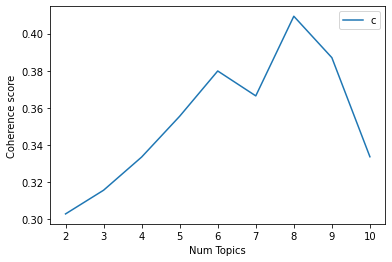

In [38]:
limit=11; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [39]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3029
Num Topics = 3  has Coherence Value of 0.3157
Num Topics = 4  has Coherence Value of 0.3335
Num Topics = 5  has Coherence Value of 0.3555
Num Topics = 6  has Coherence Value of 0.3798
Num Topics = 7  has Coherence Value of 0.3664
Num Topics = 8  has Coherence Value of 0.4093
Num Topics = 9  has Coherence Value of 0.387
Num Topics = 10  has Coherence Value of 0.3337


C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Choose the model with highest coherence score

In [40]:
chosen_model = model_list[6]

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7 - Generate popular topics and their relevant terms

In [46]:
topic_terms_dict = defaultdict(list)

# num_topics = 9 because that is the number of topics that our chosen model has
for topic_id, terms_list in chosen_model.show_topics(num_topics=8, num_words=10, formatted=False):
    topic_terms_dict[str(topic_id)] = [term[0] for term in terms_list]
topic_terms_dict = dict(topic_terms_dict)

topic_terms_dict

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'0': ['crystal',
  'dm',
  'bid',
  'stone',
  'agate',
  'help',
  'claim',
  'energy',
  'quartz',
  'please'],
 '1': ['l',
  'crystal',
  'dm',
  'bracelet',
  'agate',
  'claim',
  'energy',
  'e',
  'b',
  'v'],
 '2': ['bid',
  'crystal',
  'agate',
  'item',
  'sale',
  'order',
  'please',
  'available',
  'also',
  'make'],
 '3': ['bid',
  'crystal',
  'order',
  'please',
  'dm',
  'item',
  'x',
  'natural',
  'also',
  'make'],
 '4': ['sale',
  'dm',
  'available',
  'tower',
  'crystal',
  'interested',
  'jasper',
  'please',
  'stone',
  'help'],
 '5': ['quartz',
  'crystal',
  'dm',
  'available',
  'love',
  'piece',
  'rise',
  'help',
  'stone',
  'sale'],
 '6': ['bid',
  'crystal',
  'please',
  'quartz',
  'shipping',
  'item',
  'payment',
  'sale',
  'natural',
  'available'],
 '7': ['amethyst',
  'crystal',
  'help',
  'energy',
  'quartz',
  'sale',
  'stone',
  'live',
  'also',
  'agate']}

In [47]:
with open("topics_and_terms.json", "w") as new_file:
    json.dump(topic_terms_dict, new_file, indent=4)

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 8 - Visualize topics and terms on bubble plot

8a - Import visualization packages

In [48]:
import pyLDAvis
import pyLDAvis.gensim_models

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8b - Visualization

In [49]:
pyLDAvis.enable_notebook()
visualization = pyLDAvis.gensim_models.prepare(chosen_model, crystalsg_vecs, crystalsg_dict)

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\jewel\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


8c - Save the visualization as HTML file

In [50]:
# Go to File Explorer -> look for the html file -> double click to view in browser
pyLDAvis.save_html(visualization, "topic_visualization.html")

C:\Users\jewel\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
